In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn import preprocessing

In [2]:
csv_data = pd.read_csv('cardata.csv')
intial_df = pd.DataFrame(csv_data)
intial_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
intial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
intial_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
intial_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
working_df = intial_df.copy()
working_df.drop(columns='Car_Name',inplace=True,axis=1)
working_df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [7]:
max_year= np.max(working_df['Year'])
working_df['Age'] = max_year - working_df['Year']
working_df.drop('Year',axis=1,inplace=True)
working_df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,4
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,5
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,7
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,4
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,2
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,3
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,9
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,1


In [8]:
working_df.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,4.372093
std,5.082812,8.644115,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,0.000000
25%,0.900000,1.200000,15000.000000,0.000000,2.000000
50%,3.600000,6.400000,32000.000000,0.000000,4.000000
75%,6.000000,9.900000,48767.000000,0.000000,6.000000
max,35.000000,92.600000,500000.000000,3.000000,15.000000


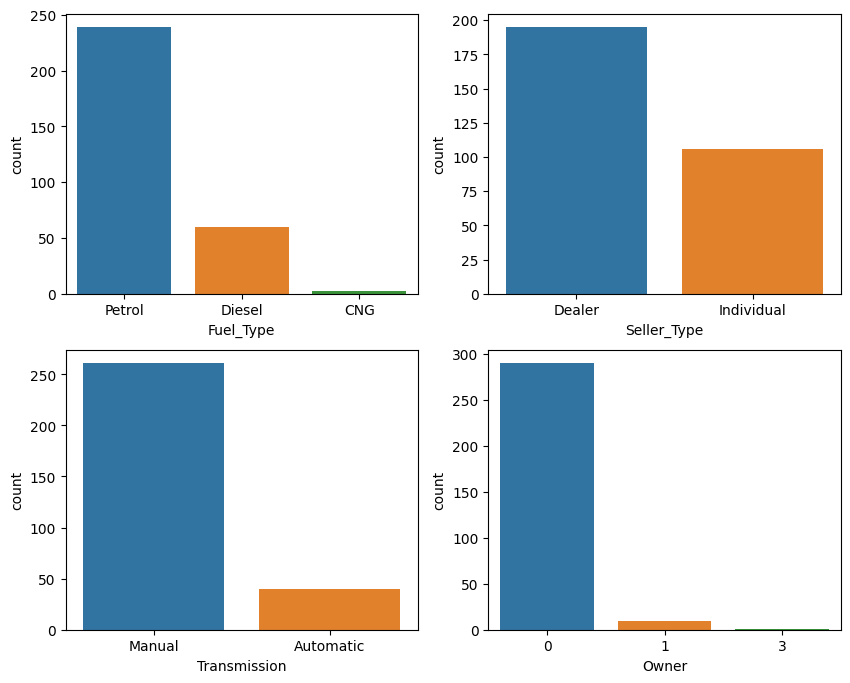

In [9]:
categorical = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, ax in enumerate(axes.flatten()):
    sns.countplot(x=categorical[i], data=working_df, ax=ax)

plt.show()


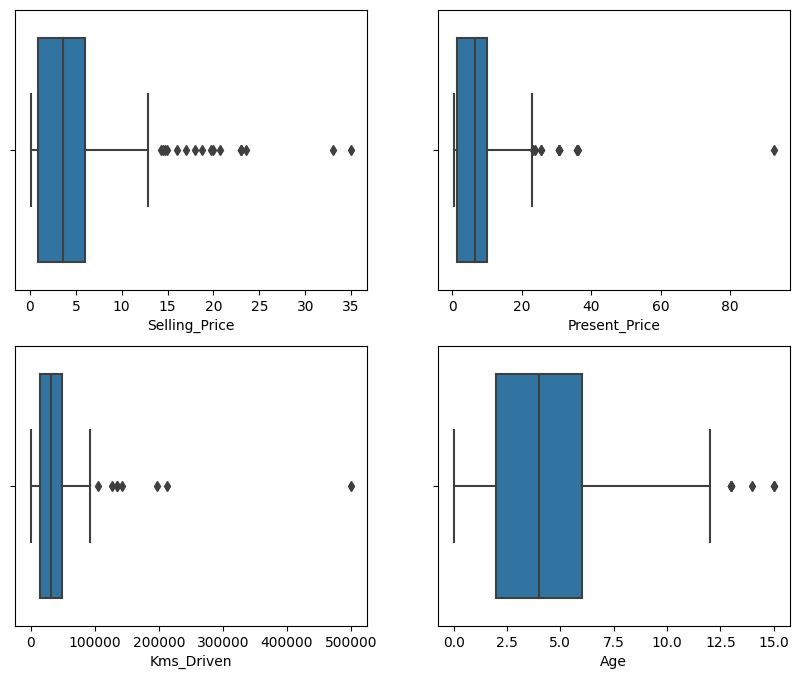

In [10]:
numerical = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x=numerical[i], data=working_df, ax=ax)

plt.show()

In [11]:
categorical_df = working_df[categorical]
numerical_df = working_df[numerical]
numerical_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Age
Selling_Price,1.000000,0.878983,0.029187,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.524342
Age,-0.236141,0.047584,0.524342,1.000000


In [12]:
print(pd.unique(categorical_df['Fuel_Type']))
print(pd.unique(categorical_df['Seller_Type']))
print(pd.unique(categorical_df['Transmission']))

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [13]:
base_df = working_df.copy()

In [14]:
working_df['Fuel_Type'].replace({'Petrol': 2, 'Diesel': 3, 'CNG': 4}, inplace=True)
working_df['Seller_Type'].replace({'Dealer': 2, 'Individual': 3}, inplace=True)
working_df['Transmission'].replace({'Manual': 2, 'Automatic': 3}, inplace=True)
working_df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,4
1,4.75,9.54,43000,3,2,2,0,5
2,7.25,9.85,6900,2,2,2,0,1
3,2.85,4.15,5200,2,2,2,0,7
4,4.60,6.87,42450,3,2,2,0,4
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,2
297,4.00,5.90,60000,2,2,2,0,3
298,3.35,11.00,87934,2,2,2,0,9
299,11.50,12.50,9000,3,2,2,0,1


In [15]:
X = working_df[['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Age']]
Y = working_df['Selling_Price']

In [16]:
def apply_model(X,Y,random_state):
    
    initial_score = 0
    
    test_size_list = [0.1,0.15,0.2,0.25,0.3]

    for test_size in test_size_list :
              
        X_train,X_test,Y_train,related_Y_test = train_test_split(X,Y,test_size=test_size,random_state=random_state)
            
        model = LinearRegression()
            
        model.fit(X_train,Y_train)
            
        related_Y_prediction = model.predict(X_test)
            
        score = metrics.r2_score(related_Y_test,related_Y_prediction)

        if score > initial_score : 

            initial_score = score

            best_test_size = test_size

            Y_test = related_Y_test

            Y_prediction = related_Y_prediction

    print(f'The best result is for the test size : {best_test_size} and its score is equal to : {initial_score}' )

    return model.fit(X_train,Y_train),Y_test,Y_prediction,initial_score    





def evaluator(Y_test,Y_prediction):

    print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_prediction))
    
    print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_prediction))
    
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_prediction)))
    
    print('R2 Score:', metrics.r2_score(Y_test, Y_prediction))



def model_improvement(splits):
    kf = KFold(n_splits=splits)
    score = cross_val_score(model,X,Y,cv=kf)
    print(f'The accuracy for each fold is equal to :\n {score}\n\n')
    print(f'The average accuracy is equal to :\n {np.mean(score)}\n\n')   
    print(f'The number of available data in each fold is equal to :\n {len(working_df)/splits}\n\n')
    return len(working_df)/splits


def fold_wiper(*args):
    


    begin = args[0] * folds_number - folds_number
            
    end = args[-1] * folds_number

    working_df_1 = working_df[working_df.index < int(begin)]
            
    working_df_2 = working_df[working_df.index > int(end)]

    working_df_3 = pd.concat([working_df_1,working_df_2]).reset_index(drop=True)
    
    X_improved = working_df_3[['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Age']]

    Y_improved = working_df_3[['Selling_Price']]
    
    return X_improved,Y_improved



def square_evaluator(dimension,test_size):

    
    r = 0.9134181721224689
    
    for column in X : 
        
        new_column_name = column + str(dimension)
        
        new_column_value = X[column] ** dimension
        
        X.insert(0,new_column_name,new_column_value)
        
        X_train_new,X_test_new,Y_train_new,Y_test_new = train_test_split(X,Y,test_size=test_size,random_state=0)
        
        new_model = LinearRegression()
        
        new_model.fit(X_train_new,Y_train_new)
        
        Y_prediction_new = new_model.predict(X_test_new)
        
        r_new = metrics.r2_score(Y_test_new,Y_prediction_new)
        
        if r_new < r : 
        
            X.drop([new_column_name],axis=1,inplace=True)
        
        else :
        
            r = r_new 
        
            print(f'R2 score is equal to : {r_new}')


def estimator():

    base_df = working_df.copy()

    base_df.loc[len(base_df)] = [0,11.23,42000,2,2,2,1,10]

    X_base = base_df[['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Age']]
    Y_base = base_df['Selling_Price']
    
    Owner2 = X_base['Owner'] ** 2
    X_base.insert(0,'Owner2',Owner2)
    
    Fuel_Type2 = X_base['Fuel_Type'] ** 2
    X_base.insert(0,'Fuel_Type2',Fuel_Type2)
    
    Kms_Driven2  = X_base['Kms_Driven'] ** 2
    X_base.insert(0,'Kms_Driven2',Kms_Driven2)
    
    Present_Price2 = X_base['Present_Price'] ** 2
    X_base.insert(0,'Present_Price2',Present_Price2)

    pres_kms = X_base['Present_Price'] * X_base['Kms_Driven']
    prs_fuel = X_base['Present_Price'] * X_base['Fuel_Type']
    pres_kms2 = X_base['Present_Price'] * X_base['Kms_Driven2']
    pres_fuel2 = X_base['Present_Price'] * X_base['Fuel_Type2']
    pres2_kms = X_base['Present_Price2'] * X_base['Kms_Driven']
    pres2_fuel = X_base['Present_Price2'] * X_base['Fuel_Type']
    pres2_kms2 = X_base['Present_Price2'] * X_base['Kms_Driven2']
    pres2_fuel2 = X_base['Present_Price2'] * X_base['Fuel_Type2']

    X_base.insert(0,'pres_kms',pres_kms)
    X_base.insert(0,'prs_fuel',prs_fuel)
    X_base.insert(0,'pres_kms2',pres_kms2)
    X_base.insert(0,'pres_fuel2',pres_fuel2)
    X_base.insert(0,'pres2_kms',pres2_kms)
    X_base.insert(0,'pres2_fuel',pres2_fuel)
    X_base.insert(0,'pres2_kms2',pres2_kms2)
    X_base.insert(0,'pres2_fuel2',pres2_fuel2)

    scaler = preprocessing.StandardScaler().fit(X_base)
    norm = scaler.transform(X_base.astype(float))
    X_norm = norm[:301]
    Y_norm = Y_base.values.reshape(-1,1)[:301]
    model = LinearRegression()
    model.fit(X_norm,Y_norm)
    norm_df = pd.DataFrame(norm)
    target = list(norm_df.iloc[-1])
    result = model.predict([target])

    return result

In [17]:
working_df


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,4
1,4.75,9.54,43000,3,2,2,0,5
2,7.25,9.85,6900,2,2,2,0,1
3,2.85,4.15,5200,2,2,2,0,7
4,4.60,6.87,42450,3,2,2,0,4
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,2
297,4.00,5.90,60000,2,2,2,0,3
298,3.35,11.00,87934,2,2,2,0,9
299,11.50,12.50,9000,3,2,2,0,1


In [18]:
len(X.columns)

7

In [19]:
X.columns

Index(['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner', 'Age'],
      dtype='object')

In [20]:
model,Y_test, Y_prediction,score = apply_model(X=X,Y=Y,random_state=0)

The best result is for the test size : 0.2 and its score is equal to : 0.9134181721224689


In [21]:
evaluator(Y_test,Y_prediction)

Mean Absolute Error: 1.0000326012144771
Mean Squared Error: 2.1885564456572277
Root Mean Squared Error: 1.4793770464818048
R2 Score: 0.9134181721224689


In [22]:
estimated_price = model.predict([[11.23,42000,1,4,6,1,10]])
print(estimated_price)

[4.17912789]


c:\Users\sina tavakoli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
folds_number = model_improvement(10)

The accuracy for each fold is equal to :
 [ 6.63522141e-01  8.80842763e-01  7.23708463e-01  8.63126108e-01
 -4.36488306e+01 -1.07944231e+03 -3.50129071e-01  7.84378582e-01
  8.27975783e-01  8.74089252e-01]


The average accuracy is equal to :
 -111.78236294080959


The number of available data in each fold is equal to :
 30.1




In [24]:
X_improved,Y_improved = fold_wiper(4,6)

In [25]:
model,Y_test,Y_prediction,score = apply_model(X=X_improved,Y=Y_improved,random_state=0)

The best result is for the test size : 0.25 and its score is equal to : 0.8545309137437785


In [26]:
evaluator(Y_test=Y_test,Y_prediction=Y_prediction)

Mean Absolute Error: 1.520413520471262
Mean Squared Error: 5.564731794761976
Root Mean Squared Error: 2.3589683751084873
R2 Score: 0.8545309137437785


In [27]:
square_evaluator(2,0.2)   

R2 score is equal to : 0.9198798658488005
R2 score is equal to : 0.9279862424439963
R2 score is equal to : 0.9285797570184755
R2 score is equal to : 0.9311515410545032


C:\Users\sina tavakoli\AppData\Local\Temp\ipykernel_11060\3698913939.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop([new_column_name],axis=1,inplace=True)
C:\Users\sina tavakoli\AppData\Local\Temp\ipykernel_11060\3698913939.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop([new_column_name],axis=1,inplace=True)
C:\Users\sina tavakoli\AppData\Local\Temp\ipykernel_11060\3698913939.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [28]:
X

,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,4
1,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,5
2,0,4,47610000,97.0225,9.85,6900,2,2,2,0,1
3,0,4,27040000,17.2225,4.15,5200,2,2,2,0,7
4,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...
296,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,2
297,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,3
298,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,9
299,0,9,81000000,156.2500,12.50,9000,3,2,2,0,1


In [29]:
pres_kms = X['Present_Price'] * X['Kms_Driven']
prs_fuel = X['Present_Price'] * X['Fuel_Type']
pres_kms2 = X['Present_Price'] * X['Kms_Driven2']
pres_fuel2 = X['Present_Price'] * X['Fuel_Type2']
pres2_kms = X['Present_Price2'] * X['Kms_Driven']
pres2_fuel = X['Present_Price2'] * X['Fuel_Type']
pres2_kms2 = X['Present_Price2'] * X['Kms_Driven2']
pres2_fuel2 = X['Present_Price2'] * X['Fuel_Type2']

In [30]:
X.insert(0,'pres_kms',pres_kms)
X.insert(0,'prs_fuel',prs_fuel)
X.insert(0,'pres_kms2',pres_kms2)
X.insert(0,'pres_fuel2',pres_fuel2)
X.insert(0,'pres2_kms',pres2_kms)
X.insert(0,'pres2_fuel',pres2_fuel)
X.insert(0,'pres2_kms2',pres2_kms2)
X.insert(0,'pres2_fuel2',pres2_fuel2)
X

,pres2_fuel2,pres2_kms2,pres2_fuel,pres2_kms,pres_fuel2,pres_kms2,prs_fuel,pres_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,124.9924,2.277986e+10,62.4962,8.436987e+05,22.36,4.075110e+09,11.18,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,4
1,819.1044,1.682804e+11,273.0348,3.913499e+06,85.86,1.763946e+10,28.62,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,5
2,388.0900,4.619241e+09,194.0450,6.694552e+05,39.40,4.689585e+08,19.70,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,1
3,68.8900,4.656964e+08,34.4450,8.955700e+04,16.60,1.122160e+08,8.30,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,7
4,424.7721,8.504893e+10,141.5907,2.003508e+06,61.83,1.237976e+10,20.61,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1211.0400,1.554416e+11,403.6800,4.573425e+06,104.40,1.340014e+10,34.80,394260.8,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,2
297,139.2400,1.253160e+11,69.6200,2.088600e+06,23.60,2.124000e+10,11.80,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,3
298,484.0000,9.356190e+11,242.0000,1.064001e+07,44.00,8.505627e+10,22.00,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,9
299,1406.2500,1.265625e+10,468.7500,1.406250e+06,112.50,1.012500e+09,37.50,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,1


In [31]:
model,Y_test,Y_prediction,score = apply_model(X=X,Y=Y,random_state=0)

The best result is for the test size : 0.3 and its score is equal to : 0.9559834872526897


In [32]:
evaluator(Y_test=Y_test,Y_prediction=Y_prediction)

Mean Absolute Error: 0.7195315140087116
Mean Squared Error: 1.3163603263150592
Root Mean Squared Error: 1.1473274712631347
R2 Score: 0.9559834872526897


In [33]:
model_improvement(5)

The accuracy for each fold is equal to :
 [  0.92455687   0.4774763  -23.72915921   0.58594619   0.88656004]


The average accuracy is equal to :
 -4.170923961240671


The number of available data in each fold is equal to :
 60.2




60.2

In [34]:
X_improved,Y_improved = fold_wiper(3)

In [35]:
model,Y_test,Y_prediction,score = apply_model(X=X_improved,Y=Y_improved,random_state=0)

The best result is for the test size : 0.15 and its score is equal to : 0.8953266152589854


In [36]:
evaluator(Y_test=Y_test,Y_prediction=Y_prediction)

Mean Absolute Error: 0.9402252526458346
Mean Squared Error: 1.9703497264008194
Root Mean Squared Error: 1.4036914641048508
R2 Score: 0.8953266152589854


In [37]:
result = estimator()
print(float(result))

4.976052593555589
